## Exploring L1000 metadata
### What kinds of replicates did L1000 do?

In [83]:
from tqdm import tqdm
from pymongo import MongoClient
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import json
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
# This is the L1000 data, where each doc is an assay
# Downloaded from http://download.lincscloud.org/ (which is currently down)
# Maybe its on here: http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE70138 ?
# who knows
client = MongoClient("wl-cmadmin.scripps.edu", 27020)
db = client.LINCS_L1000_CD.LINCScloud
print("Total: {}".format(db.count()))

Total: 389031


In [24]:
# Just get the metadata keys
keys = {'pert_dose_unit', '_id', 'pert_id', 'batch', 'pert_time_unit', 'pert_time', 'sig_id', 'replicateCount', 'cell_id', 'pert_desc', 'pert_dose', 'pert_type'}
doc=db.find_one()
{k:v for k,v in doc.items() if k in keys}

{'_id': ObjectId('543d9200e4b0e6d1d5174eb4'),
 'batch': 'CPC001_HA1E_24H',
 'cell_id': 'HA1E',
 'pert_desc': 'geldanamycin',
 'pert_dose': '10.0',
 'pert_dose_unit': 'um',
 'pert_id': 'BRD-A19500257',
 'pert_time': '24.0',
 'pert_time_unit': 'h',
 'pert_type': 'trt_poscon',
 'replicateCount': 2,
 'sig_id': 'CPC001_HA1E_24H:BRD-A19500257:10.0'}

In [5]:
# Load in all the data (from mongo, slow)
r = db.find({},{k:1 for k in keys})
data = list(r)
print(len(data))
df = pd.DataFrame(data)
df.to_csv("L1000_LINCScloud.csv")

In [22]:
# or Load in all the data (from csv)
df = pd.read_csv("L1000_LINCScloud.csv", index_col=0, low_memory=False)

In [23]:
df.head()

,_id,batch,cell_id,pert_desc,pert_dose,pert_dose_unit,pert_id,pert_time,pert_time_unit,pert_type,replicateCount,sig_id
0,543d9200e4b0e6d1d5174eb4,CPC001_HA1E_24H,HA1E,geldanamycin,10.0,um,BRD-A19500257,24.0,h,trt_poscon,2,CPC001_HA1E_24H:BRD-A19500257:10.0
1,543d9201e4b0e6d1d5174eb5,CPC001_HA1E_24H,HA1E,cycloheximide-N-ethylethanoate,10.0,um,BRD-A82329351,24.0,h,trt_cp,3,CPC001_HA1E_24H:BRD-A82329351:10.0
2,543d9201e4b0e6d1d5174eb6,CPC001_HA1E_24H,HA1E,Tubocurarine chloride pentahydrate (+),10.0,um,BRD-K02607075,24.0,h,trt_cp,3,CPC001_HA1E_24H:BRD-K02607075:10.0
3,543d9201e4b0e6d1d5174eb7,CPC001_HA1E_24H,HA1E,Scopolamin-N-oxide hydrobromide,10.0,um,BRD-A49906757,24.0,h,trt_cp,3,CPC001_HA1E_24H:BRD-A49906757:10.0
4,543d9201e4b0e6d1d5174eb8,CPC001_HA1E_24H,HA1E,PROPYL-beta-CARBOLINE-3-CARBOXYLATE,10.0,um,BRD-K85242180,24.0,h,trt_cp,3,CPC001_HA1E_24H:BRD-K85242180:10.0


In [39]:
cell_info = pd.read_csv("l1000_cellinfo.csv", index_col=0)
cell_info.head()

,_id,cell_alias,cell_aliases,cell_histology,cell_id,cell_lineage,cell_source,cell_source_id,cell_type,gender,is_from_metastasis,lincs_status,metastatic_site,mutations
1184,521bbc941c1c0625a8ca0f29,NaN,NaN,skin fibroblast,1184,NaN,ECACC,90011883,NaN,NaN,NaN,NaN,NaN,NaN
1205LU,521bbc941c1c0625a8ca0f33,NaN,NaN,melanoma,1205LU,NaN,ATCC,CRL-2812,NaN,NaN,NaN,NaN,NaN,NaN
1221,521bbc941c1c0625a8ca0f2a,NaN,NaN,"skin fibroblast,thioguanine resistant",1221,NaN,ECACC,90011873,NaN,NaN,NaN,NaN,NaN,NaN
1301,521bbc941c1c0625a8ca0f2b,NaN,NaN,"leukemia,ALL,T cell",1301,blood,ICLC,HTL01004,NaN,NaN,NaN,NaN,NaN,NaN
1306,521bbc941c1c0625a8ca0f2c,NaN,NaN,skin fibroblast,1306,NaN,ECACC,90011887,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
pert_info = pd.read_csv("l1000_pertinfo.csv", index_col=0, low_memory=False)
pert_info.head()

,_id,alt_name,canonical_smiles,cell_id,clone_name,in_summly,inchi_key,inchi_string,logp,mls_id,...,pert_vendor,pubchem_cid,seed_seq6,seed_seq7,sig_id,sig_id_gold,structure_url,target_region,target_seq,vector_id
56582,51cccb0ada08267b0f9dc594,NaN,NaN,['HEK293T'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"['HSF037_HEK293T_48H:56582:150', 'HSF038_HEK29...","['HSF037_HEK293T_48H:56582:150', 'HSF045_HEK29...",NaN,NaN,NaN,NaN
5981,51cccb0ada08267b0f9dc595,NaN,NaN,['HEK293T'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"['HSF033_HEK293T_48H:5981:150', 'HSF034_HEK293...","['HSF033_HEK293T_48H:5981:150', 'HSF034_HEK293...",NaN,NaN,NaN,NaN
7150,51cccb0ada08267b0f9dc596,NaN,NaN,['HEK293T'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"['HSF033_HEK293T_48H:7150:150', 'HSF034_HEK293...","['HSF041_HEK293T_48H:7150:150', 'HSF042_HEK293...",NaN,NaN,NaN,NaN
ABL1_G2A,51cccb0ada08267b0f9dc597,NaN,NaN,['HEK293T'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"['HSF033_HEK293T_48H:ABL1_G2A:150', 'HSF034_HE...","['HSF034_HEK293T_48H:ABL1_G2A:150', 'HSF041_HE...",NaN,NaN,NaN,NaN
ABL1_T315I,51cccb0ada08267b0f9dc598,NaN,NaN,['HEK293T'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"['HSF033_HEK293T_48H:ABL1_T315I:150', 'HSF034_...","['HSF033_HEK293T_48H:ABL1_T315I:150', 'HSF035_...",NaN,NaN,NaN,NaN


In [ ]:
### How many replicates per assay?

In [99]:
df.replicateCount.value_counts()[:10]

3     194936
2      94643
4      48491
5      29359
6       9825
1       5205
9       2396
8       1968
7        811
12       601
Name: replicateCount, dtype: int64

### What are the most commonly used cell lines?

In [75]:
# cell lines and number of assays performed
cell_counts = df['cell_id'].value_counts()
cell_counts = cell_counts/cell_counts.sum() #normalize
common_cells = cell_counts[cell_counts>0.01]
common_cells

VCAP      0.147078
MCF7      0.134624
PC3       0.122450
A549      0.096591
A375      0.086512
HT29      0.078269
HA1E      0.067254
HCC515    0.060957
HEPG2     0.054063
NPC       0.019726
ASC       0.014978
Name: cell_id, dtype: float64

In [76]:
# metadata about the most commonly used cell lines
cell_info.loc[common_cells.index, cell_info.columns[2:13]]

,cell_aliases,cell_histology,cell_id,cell_lineage,cell_source,cell_source_id,cell_type,gender,is_from_metastasis,lincs_status,metastatic_site
VCAP,NaN,carcinoma,VCAP,prostate,ATCC,CRL-2876,cancer,M,Y,"['core_cline', 'DIVR']",vertebra
MCF7,NaN,carcinoma,MCF7,breast,ATCC,HTB-22,cancer,F,Y,"['core_cline', 'DIVR']",pleural_effusion
PC3,PC-3,carcinoma,PC3,prostate,ATCC,CRL-1435,cancer,M,Y,"['core_cline', 'DIVR']",bone
A549,NaN,"carcinoma,non-small cell",A549,lung,ATCC,CCL-185,cancer,M,NaN,"['core_cline', 'DIVR']",NaN
A375,A-375,melanoma,A375,skin,ATCC,CRL-1619,cancer,F,NaN,"['core_cline', 'DIVR']",NaN
HT29,HT-29,"adenocarcinoma,colorectal",HT29,"large intestine,colon",ATCC,HTB-38,cancer,F,NaN,"['core_cline', 'DIVR']",NaN
HA1E,NaN,normal kidney,HA1E,"large intestine,rectum","Bill Hahn, Broad Institute",NaN,immortalized normal,NaN,NaN,"['core_cline', 'DIVR']",NaN
HCC515,NaN,carcinoma,HCC515,lung,Broad Institute,NaN,cancer,NaN,NaN,"['core_cline', 'DIVR']",NaN
HEPG2,NaN,"carcinoma,hepatocellular",HEPG2,liver,ATCC,HB-8065,cancer,M,NaN,"['core_cline', 'DIVR']",NaN
NPC,NPC-8330-8 NEURAL PROGENITORS,normal stem fibroblast-derived iPScs,NPC,"CNS,iPS","Stephen Haggarty, MGH",NaN,primary,NaN,NaN,['core_pline'],NaN


## How many cell lines per perturbation, where the perturbation is a drug/compound?

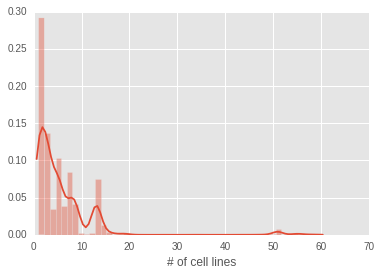

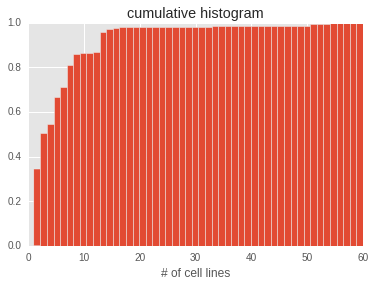

In [90]:
df_cp = df.query("pert_type == 'trt_cp'")
num_lines_per_pert = df_cp.groupby("pert_id").agg({'cell_id': lambda x: len(set(x))})['cell_id']
sns.distplot(num_lines_per_pert)
plt.xlabel("# of cell lines")
sns.plt.show()
num_lines_per_pert.hist(bins = 50, cumulative=True, normed=True)
plt.xlabel("# of cell lines")
plt.title("cumulative histogram")

## What kind of perturbations?
http://support.lincscloud.org/hc/en-us/articles/202216073

Chemical compound	trt_cp
Gene knockdown	trt_sh
Gene over expression	trt_oe

In [96]:
pert_types = df.pert_type.value_counts()
pert_types/pert_types.sum()

trt_cp        0.517912
trt_sh        0.398408
trt_oe        0.057731
trt_lig       0.014084
trt_poscon    0.009359
trt_oe.mut    0.002499
ctl_untrt     0.000008
Name: pert_type, dtype: float64

### Overexpression

In [101]:
## Number of genes targeted for overexpression for each cell line
{cell_id:len(set(thisdf.pert_desc)) for cell_id, thisdf in df.query("pert_type == 'trt_oe'").groupby("cell_id")}

{'A375': 2281,
 'A549': 1798,
 'HA1E': 2159,
 'HCC515': 2160,
 'HEK293T': 1186,
 'HEPG2': 2159,
 'HT29': 2160,
 'MCF7': 2160,
 'PC3': 2281,
 'VCAP': 1800}

### Gene knockdown

In [104]:
# cell lines and number of assays for gene knockdown assays
df.query("pert_type == 'trt_sh'").cell_id.value_counts()[:10]

PC3       21190
VCAP      20804
MCF7      19669
A375      14800
HA1E      14305
A549      13949
HT29      13575
HCC515    12966
HEPG2     12868
ASC        3318
Name: cell_id, dtype: int64

In [123]:
# cell lines: number of genes knocked down (pert_desc) and number of assays (cell_id)
df.query("pert_type == 'trt_sh'").groupby("cell_id").agg({'pert_desc':lambda x:len(set(x)), 'cell_id':len}).sort_values('pert_desc', ascending=False).head(10)

,pert_desc,cell_id
cell_id,,
VCAP,4136,20804
PC3,3983,21190
A375,3827,14800
HA1E,3802,14305
A549,3725,13949
MCF7,3689,19669
HT29,3666,13575
HEPG2,3563,12868
HCC515,3523,12966


3.0


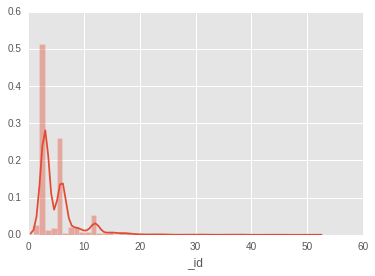

In [160]:
# In PC3 cells, how many times did they knockdown each gene?
nrep_vcap = df.query("pert_type == 'trt_sh' & cell_id == 'PC3'").groupby("pert_desc").agg(len)['_id']
print(nrep_vcap.median())
sns.distplot(nrep_vcap)

In [154]:
## What are the replicates of?
sh_PC3_YY1 = df.query("pert_type == 'trt_sh' & cell_id == 'PC3' & pert_desc == 'YY1'")
sh_PC3_YY1

,_id,batch,cell_id,pert_desc,pert_dose,pert_dose_unit,pert_id,pert_time,pert_time_unit,pert_type,replicateCount,sig_id
162828,54476c70e4b007b241b27899,EKW001_PC3_120H,PC3,YY1,2.0,ul,TRCN0000297380,120.0,h,trt_sh,3,EKW001_PC3_120H:TRCN0000297380:2.0
162829,54476c70e4b007b241b2789a,EKW001_PC3_120H,PC3,YY1,2.0,ul,TRCN0000019898,120.0,h,trt_sh,3,EKW001_PC3_120H:TRCN0000019898:2.0
162840,54476c71e4b007b241b278a5,EKW001_PC3_120H,PC3,YY1,2.0,ul,TRCN0000019895,120.0,h,trt_sh,3,EKW001_PC3_120H:TRCN0000019895:2.0
191679,544c245fe4b007b241b2e94c,KDA005_PC3_144H,PC3,YY1,-666.0,-666.0,TRCN0000019896,144.0,h,trt_sh,3,KDA005_PC3_144H:TRCN0000019896:-666.0
191691,544c2460e4b007b241b2e958,KDA005_PC3_144H,PC3,YY1,-666.0,-666.0,TRCN0000019898,144.0,h,trt_sh,3,KDA005_PC3_144H:TRCN0000019898:-666.0
191715,544c2462e4b007b241b2e970,KDA005_PC3_144H,PC3,YY1,-666.0,-666.0,TRCN0000019894,144.0,h,trt_sh,3,KDA005_PC3_144H:TRCN0000019894:-666.0
191982,544c32ade4b007b241b2ea7b,KDA005_PC3_96H,PC3,YY1,-666.0,-666.0,TRCN0000019894,96.0,h,trt_sh,3,KDA005_PC3_96H:TRCN0000019894:-666.0
192032,544c32b1e4b007b241b2eaad,KDA005_PC3_96H,PC3,YY1,-666.0,-666.0,TRCN0000019896,96.0,h,trt_sh,3,KDA005_PC3_96H:TRCN0000019896:-666.0
192174,544c32bde4b007b241b2eb3b,KDA005_PC3_96H,PC3,YY1,-666.0,-666.0,TRCN0000019898,96.0,h,trt_sh,3,KDA005_PC3_96H:TRCN0000019898:-666.0
384820,54675919e4b09dc4d8066aad,TAK002_PC3_96H,PC3,YY1,-666.0,-666.0,TRCN0000297380,96.0,h,trt_sh,3,TAK002_PC3_96H:TRCN0000297380:-666.0


In [155]:
pert_info.loc[sh_PC3_YY1.pert_id,['clone_name','target_seq','target_region']]

,clone_name,target_seq,target_region
TRCN0000297380,NM_003403.3-1641s21c1,CGATGGTTGTAATAAGAAGTT,CDS
TRCN0000019898,NM_003403.3-904s1c1,GACGACGACTACATTGAACAA,CDS
TRCN0000019895,NM_003403.3-1297s1c1,CCCAAACAACTGGCAGAATTT,CDS
TRCN0000019896,NM_003403.3-1641s1c1,CGATGGTTGTAATAAGAAGTT,CDS
TRCN0000019898,NM_003403.3-904s1c1,GACGACGACTACATTGAACAA,CDS
TRCN0000019894,NM_003403.3-1793s1c1,GCCTCTCCTTTGTATATTATT,3UTR
TRCN0000019894,NM_003403.3-1793s1c1,GCCTCTCCTTTGTATATTATT,3UTR
TRCN0000019896,NM_003403.3-1641s1c1,CGATGGTTGTAATAAGAAGTT,CDS
TRCN0000019898,NM_003403.3-904s1c1,GACGACGACTACATTGAACAA,CDS
TRCN0000297380,NM_003403.3-1641s21c1,CGATGGTTGTAATAAGAAGTT,CDS


In [ ]:
# They did different clones, targetting different regions on the same gene (or UTR), and also different time points

In [158]:
# On ones with 3 reps:
sh_PC3_FIS1 = df.query("pert_type == 'trt_sh' & cell_id == 'PC3' & pert_desc == 'FIS1'")
sh_PC3_FIS1

,_id,batch,cell_id,pert_desc,pert_dose,pert_dose_unit,pert_id,pert_time,pert_time_unit,pert_type,replicateCount,sig_id
386474,5467a473e4b09dc4d8067123,KDB001_PC3_96H,PC3,FIS1,-666.0,-666,TRCN0000281304,96.0,h,trt_sh,2,KDB001_PC3_96H:TRCN0000281304:-666.0
386475,5467a473e4b09dc4d8067124,KDB001_PC3_96H,PC3,FIS1,-666.0,-666,TRCN0000154799,96.0,h,trt_sh,2,KDB001_PC3_96H:TRCN0000154799:-666.0
386600,5467a47ce4b09dc4d80671a1,KDB001_PC3_96H,PC3,FIS1,-666.0,-666,TRCN0000155276,96.0,h,trt_sh,2,KDB001_PC3_96H:TRCN0000155276:-666.0


In [159]:
pert_info.loc[sh_PC3_FIS1.pert_id,['clone_name','target_seq','target_region']]

,clone_name,target_seq,target_region
TRCN0000281304,NM_016068.2-179s21c1,CAAGAGCACGCAGTTTGAGTA,CDS
TRCN0000154799,NM_016068.1-321s1c1,GAACTACCGGCTCAAGGAATA,CDS
TRCN0000155276,NM_016068.1-417s1c1,GCTCATTGACAAGGCCATGAA,CDS


### Chemical compound

In [165]:
# cell lines: number of drugs used (pert_id) and number of assays (cell_id)
df_cp = df.query("pert_type == 'trt_cp'")
df_cp.groupby("cell_id").agg({'pert_id':lambda x:len(set(x)), 'cell_id':len}).sort_values('pert_id', ascending=False).head(10)

,pert_id,cell_id
cell_id,,
VCAP,15852,33320
A549,12497,21231
A375,11335,15104
MCF7,11265,29215
HT29,10913,14182
PC3,10908,22149
HCC515,5044,8201
HA1E,4959,9283
HEPG2,3927,5644


In [250]:
# save the perturbation name for compounds
pert_id_name = pert_info.pert_iname.to_dict()
name = df_cp.pert_id.apply(lambda x:pert_id_name.get(x, None))
name.index = df_cp.index.copy()
df_cp = df_cp.assign(pert_name = name)

In [254]:
#55 that are mixes of something?
df_cp[df_cp.pert_name.isnull()].pert_desc

172396       HDACi1,2 + 3_mix
172397       HDACi1,2 + 3_mix
172398       HDACi1,2 + 3_mix
172399       HDACi1,2 + 3_mix
172401       HDACi1,2 + 3_mix
172411       HDACi1,2 + 3_mix
172433       HDACi1,2 + 3_mix
172480       HDACi1,2 + 3_mix
172559       HDACi1,2 + 3_mix
172561       HDACi1,2 + 3_mix
172562       HDACi1,2 + 3_mix
172564       HDACi1,2 + 3_mix
172568       HDACi1,2 + 3_mix
172591       HDACi1,2 + 3_mix
172634       HDACi1,2 + 3_mix
172668       HDACi1,2 + 3_mix
172730       HDACi1,2 + 3_mix
172731       HDACi1,2 + 3_mix
172751       HDACi1,2 + 3_mix
172757       HDACi1,2 + 3_mix
172778       HDACi1,2 + 3_mix
172807       HDACi1,2 + 3_mix
172823       HDACi1,2 + 3_mix
172827       HDACi1,2 + 3_mix
172907       HDACi1,2 + 3_mix
172908       HDACi1,2 + 3_mix
172935       HDACi1,2 + 3_mix
172936       HDACi1,2 + 3_mix
172981       HDACi1,2 + 3_mix
172988       HDACi1,2 + 3_mix
173009       HDACi1,2 + 3_mix
173016       HDACi1,2 + 3_mix
173080       HDACi1,2 + 3_mix
173083    

In [255]:
# What are the most common drugs and how many assays were they used in?
df_cp.groupby('pert_name').agg(len)['_id'].sort_values(ascending=False).head(20)

pert_name
vorinostat        481
sirolimus         413
curcumin          326
estradiol         301
wortmannin        296
trichostatin-a    286
geldanamycin      265
tozasertib        262
sulforaphane      262
tamoxifen         257
dexamethasone     246
tretinoin         214
tanespimycin      200
LY-294002         198
BRD-K98948170     197
parthenolide      191
resveratrol       172
panobinostat      170
genistein         169
barasertib        166
Name: _id, dtype: int64

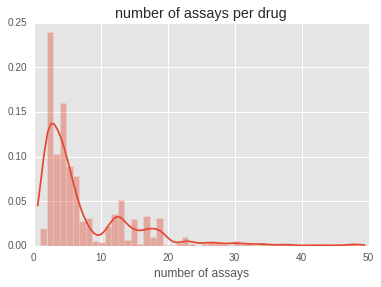

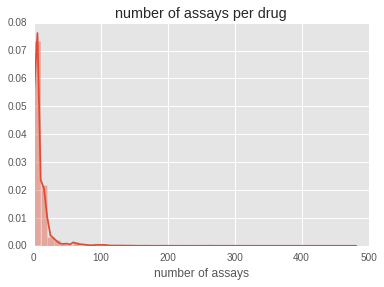

In [256]:
# On average, how many assay per drug?
num_assays_per_drug = df_cp.groupby("pert_name").agg({'cell_id': len})['cell_id']
sns.distplot(num_assays_per_drug[num_assays_per_drug<50])
sns.plt.title('number of assays per drug')
sns.plt.xlabel("number of assays")
sns.plt.show()
sns.distplot(num_assays_per_drug)
sns.plt.title('number of assays per drug')
sns.plt.xlabel("number of assays")
sns.plt.show()

Number of assays: 481
Number of cell lines: 56
Number of perturbation dosages: 42
0.0012207000000000001 - 30.0 {'um'}


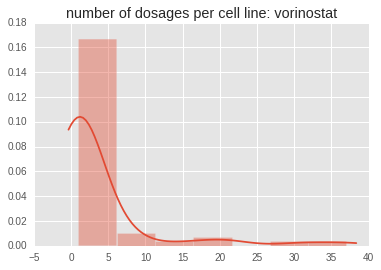

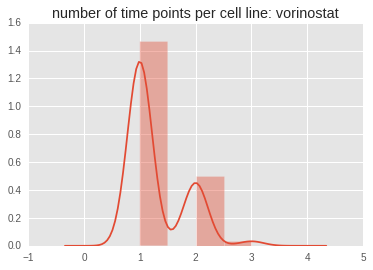

In [261]:
# what did they do with these?
drug = "vorinostat"
def assay_info(drug):
    this_df = df_cp[df_cp.pert_name == drug]
    print("Number of assays: {}".format(len(this_df.cell_id)))
    print("Number of cell lines: {}".format(len(set(this_df.cell_id))))
    print("Number of perturbation dosages: {}".format(len(set(this_df.pert_dose))))
    print("{} - {} {}".format(this_df.pert_dose.min(), this_df.pert_dose.max(), set(this_df.pert_dose_unit)))

    sns.distplot(this_df.groupby("cell_id").agg({'pert_dose':lambda x: len(set(x))}))
    sns.plt.title('number of dosages per cell line: {}'.format(drug))
    sns.plt.show()

    sns.distplot(this_df.groupby("cell_id").agg({'pert_time':lambda x: len(set(x))}))
    sns.plt.title('number of time points per cell line: {}'.format(drug))
    sns.plt.show()
assay_info(drug)

Number of assays: 95
Number of cell lines: 17
Number of perturbation dosages: 7
0.37000000476800005 - 10.0 {'um'}


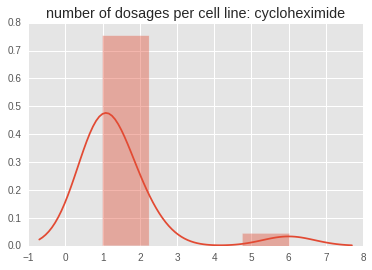

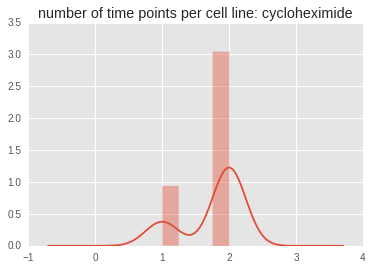

In [262]:
assay_info("cycloheximide")